In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PSD/tubes/final_subcount.csv')
df = df.drop(columns=['cluster_dbscan'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1418 entries, 0 to 1417
Data columns (total 96 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_chembl_id  1418 non-null   object 
 1   SubFPC1             1418 non-null   float64
 2   SubFPC2             1418 non-null   float64
 3   SubFPC3             1418 non-null   float64
 4   SubFPC4             1418 non-null   float64
 5   SubFPC5             1418 non-null   float64
 6   SubFPC6             1418 non-null   float64
 7   SubFPC8             1418 non-null   float64
 8   SubFPC9             1418 non-null   float64
 9   SubFPC10            1418 non-null   float64
 10  SubFPC12            1418 non-null   float64
 11  SubFPC13            1418 non-null   float64
 12  SubFPC14            1418 non-null   float64
 13  SubFPC15            1418 non-null   float64
 14  SubFPC16            1418 non-null   float64
 15  SubFPC17            1418 non-null   float64
 16  SubFPC

In [39]:
# Membaca file CSV
df_pIC50 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PSD/tubes/final_active_potential_compound_with_cluster.csv')
df_pIC50.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_chembl_id  1400 non-null   object 
 1   canonical_smiles    1400 non-null   object 
 2   class               1400 non-null   object 
 3   MW                  1400 non-null   float64
 4   LogP                1400 non-null   float64
 5   NumHDonors          1400 non-null   float64
 6   NumHAcceptors       1400 non-null   float64
 7   pIC50               1400 non-null   float64
 8   cluster_dbscan      1400 non-null   int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 98.6+ KB


In [45]:
df = df[df['molecule_chembl_id'].isin(df_pIC50['molecule_chembl_id'])]
df[['pIC50', 'MW', 'NumHDonors', 'NumHAcceptors']] = df_pIC50.set_index('molecule_chembl_id').loc[df['molecule_chembl_id']][['pIC50', 'MW', 'NumHDonors', 'NumHAcceptors']].values
df = df.dropna()
df.head(20)

,molecule_chembl_id,SubFPC1,SubFPC2,SubFPC3,SubFPC4,SubFPC5,SubFPC6,SubFPC8,SubFPC9,SubFPC10,...,SubFPC299,SubFPC300,SubFPC301,SubFPC302,SubFPC303,SubFPC307,pIC50,MW,NumHDonors,NumHAcceptors
0,CHEMBL431859,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,5.0,4.0,0.0,20.0,6.623423,412.306,0.0,3.0
1,CHEMBL113637,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,6.0,6.0,4.0,0.0,20.0,7.244125,319.383,0.0,3.0
2,CHEMBL112021,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,5.0,4.0,0.0,20.0,7.267606,321.811,0.0,3.0
3,CHEMBL41761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,4.0,4.0,0.0,19.0,7.387216,319.383,0.0,3.0
4,CHEMBL111868,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,5.0,4.0,0.0,20.0,7.105130,384.252,0.0,3.0
5,CHEMBL111888,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,4.0,3.0,0.0,20.0,7.285670,398.279,0.0,3.0
6,CHEMBL112074,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,5.0,4.0,0.0,20.0,6.688246,301.393,0.0,3.0
7,CHEMBL324326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,4.0,4.0,0.0,19.0,7.301030,312.376,0.0,4.0
8,CHEMBL1630261,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,6.0,6.0,1.0,1.0,13.0,7.301030,288.431,1.0,2.0
9,CHEMBL169251,2.0,8.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,20.0,20.0,0.0,0.0,9.0,6.769551,224.263,1.0,2.0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1400 entries, 0 to 1417
Data columns (total 100 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_chembl_id  1400 non-null   object 
 1   SubFPC1             1400 non-null   float64
 2   SubFPC2             1400 non-null   float64
 3   SubFPC3             1400 non-null   float64
 4   SubFPC4             1400 non-null   float64
 5   SubFPC5             1400 non-null   float64
 6   SubFPC6             1400 non-null   float64
 7   SubFPC8             1400 non-null   float64
 8   SubFPC9             1400 non-null   float64
 9   SubFPC10            1400 non-null   float64
 10  SubFPC12            1400 non-null   float64
 11  SubFPC13            1400 non-null   float64
 12  SubFPC14            1400 non-null   float64
 13  SubFPC15            1400 non-null   float64
 14  SubFPC16            1400 non-null   float64
 15  SubFPC17            1400 non-null   float64
 16  SubFPC18  

Terdapat beberapa pertimbangan selain kelengkapan fitur, yaitu sebagai berikut :

Keefektifan: (pIC50 yang lebih tinggi >= 6.5)
1. Anastrozole
*   pIC50: ~8.0–8.5
*   IC50: 0.1–0.3 nM
2. Letrozole
*   pIC50: ~8.5–9.0
*   IC50: ~0.05–0.1 nM
3. Exemestane
*   pIC50: ~6.5–7.0
*   IC50: 10–30 nM

Hydrogen Bounds: (maka HBD 0-2, dan HBA 2-6)
1. Anastrozole memiliki:
*   HBD: 0
*   HBA: 5
2. Letrozole memiliki:
*   HBD: 0
*   HBA: 6
3. Exemestane memiliki:
*   HBD: 1
*   HBA: 2

Molecular Weight : (MW yang lebih kecil)




In [57]:
data = df[
    (df['pIC50'] >= 6.5) &
    (df['MW'] <= 300) &
    (df['NumHDonors'] >= 0) & (df['NumHDonors'] <= 2) &
    (df['NumHAcceptors'] >= 2) & (df['NumHAcceptors'] <= 6)
].reset_index(drop=True)
data.describe()

,SubFPC1,SubFPC2,SubFPC3,SubFPC4,SubFPC5,SubFPC6,SubFPC8,SubFPC9,SubFPC10,SubFPC12,...,SubFPC299,SubFPC300,SubFPC301,SubFPC302,SubFPC303,SubFPC307,pIC50,MW,NumHDonors,NumHAcceptors
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.0,203.0,203.000000,203.0,203.000000,...,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,0.576355,1.852217,0.645320,0.305419,0.201970,0.0,0.0,0.014778,0.0,0.059113,...,0.039409,6.620690,6.620690,2.408867,0.098522,13.669951,7.400900,260.446320,0.364532,3.261084
std,0.958460,2.501056,1.190854,0.664011,0.529894,0.0,0.0,0.210559,0.0,0.236420,...,0.218962,5.507777,5.507777,1.584367,0.358970,3.349957,0.755609,32.032298,0.567366,1.007798
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,6.502007,150.177000,0.000000,2.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,3.000000,3.000000,1.000000,0.000000,11.000000,6.795880,239.310500,0.000000,3.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,5.000000,5.000000,2.000000,0.000000,13.000000,7.240030,268.316000,0.000000,3.000000
75%,1.000000,3.000000,1.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,9.000000,9.000000,4.000000,0.000000,16.000000,7.832773,288.322500,1.000000,4.000000
max,4.000000,9.000000,4.000000,2.000000,3.000000,0.0,0.0,3.000000,0.0,1.000000,...,2.000000,23.000000,23.000000,7.000000,2.000000,26.000000,10.301030,299.761000,2.000000,6.000000


In [72]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import time

def complete_subfpc_kennard_stone(df, num_samples, pic50_weight):
    start_time = time.time()

    subfpc_cols = [col for col in df.columns if col.startswith('SubFPC')]
    complete_mask = df[subfpc_cols].notna().all(axis=1)
    filtered_df = df[complete_mask].copy()

    if filtered_df.shape[0] < num_samples:
        raise ValueError(f"Jumlah data setelah filtering ({filtered_df.shape[0]}) kurang dari num_samples ({num_samples})")

    scaler = MinMaxScaler()
    subfpc_scaled = scaler.fit_transform(filtered_df[subfpc_cols])
    pic50_scaled = scaler.fit_transform(filtered_df[['pIC50']]).flatten()

    num_data = subfpc_scaled.shape[0]
    distance_matrix = np.sqrt(((subfpc_scaled[:, None, :] - subfpc_scaled[None, :, :]) ** 2).sum(axis=2))

    start_idx = filtered_df['pIC50'].idxmax()
    selected_indices = [filtered_df.index.get_loc(start_idx)]

    distances_from_first = distance_matrix[selected_indices[0]]
    second_idx = np.argmax(distances_from_first)
    selected_indices.append(second_idx)

    remaining_indices = list(set(range(num_data)) - set(selected_indices))

    while len(selected_indices) < num_samples and remaining_indices:
        min_distances = np.min(distance_matrix[remaining_indices][:, selected_indices], axis=1)

        if len(min_distances) == 0:
            break

        norm_distances = (min_distances - min_distances.min()) / (min_distances.max() - min_distances.min()) if min_distances.max() != min_distances.min() else min_distances
        norm_y = (pic50_scaled[remaining_indices] - pic50_scaled.min()) / (pic50_scaled.max() - pic50_scaled.min()) if pic50_scaled.max() != pic50_scaled.min() else pic50_scaled[remaining_indices]

        scores = (1 - pic50_weight) * norm_distances + pic50_weight * norm_y

        next_idx = remaining_indices[np.argmax(scores)]
        selected_indices.append(next_idx)
        remaining_indices.remove(next_idx)

    end_time = time.time()
    elapsed_time = end_time - start_time

    print(f"Waktu komputasi: {elapsed_time:.4f} detik")

    return selected_indices

In [73]:
num_samples = 30
pic50_weight = 0.4
selected_data = {}

selected_indices = complete_subfpc_kennard_stone(data, num_samples, pic50_weight)
selected_data = data.iloc[selected_indices]
print(f"Data sampel terpilih :")
print(selected_data)

Waktu komputasi: 0.0311 detik
Data sampel terpilih :
    molecule_chembl_id  SubFPC1  SubFPC2  SubFPC3  SubFPC4  SubFPC5  SubFPC6  \
18         CHEMBL73993      2.0      8.0      3.0      2.0      1.0      0.0   
186       CHEMBL137373      0.0      0.0      0.0      0.0      0.0      0.0   
113          CHEMBL117      0.0      0.0      0.0      0.0      0.0      0.0   
107       CHEMBL589974      0.0      0.0      0.0      0.0      0.0      0.0   
13         CHEMBL31760      1.0      8.0      2.0      2.0      2.0      0.0   
6         CHEMBL281947      0.0      6.0      2.0      1.0      0.0      0.0   
114      CHEMBL1097371      3.0      3.0      4.0      0.0      1.0      0.0   
120      CHEMBL1083353      0.0      0.0      0.0      0.0      0.0      0.0   
161      CHEMBL4227385      0.0      0.0      0.0      0.0      0.0      0.0   
17        CHEMBL307643      3.0      8.0      4.0      2.0      1.0      0.0   
150      CHEMBL2336856      1.0      1.0      0.0      0.0      1.0

In [13]:
!pip install rdkit-pypi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 34.2 MB/s eta 0:00:00


In [14]:
!pip install py3Dmol

In [50]:
df_sample_molecule = df_pIC50[df_pIC50['molecule_chembl_id'].isin(selected_data['molecule_chembl_id'])]
df_sample_molecule

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50,cluster_dbscan
32,CHEMBL281947,Nc1ccc(C23CC2C(=O)N(CC2CCCCC2)C3=O)cc1,active,298.386,2.47560,1.0,3.0,8.301030,0
43,CHEMBL31760,C=C(c1ccc(C#N)cc1)n1ccnc1,active,195.225,2.27378,0.0,3.0,9.154902,1
68,CHEMBL307643,CC12CCC3C(C[C@H](O)C4=CCCCC43C)C1CCC2=O,active,288.431,3.87920,1.0,2.0,9.721246,1
81,CHEMBL73993,CC12CCC3C(C[C@@H](O)C4=CCCCC43C)C1CCC2=O,active,288.431,3.87920,1.0,2.0,10.301030,1
145,CHEMBL163420,N#CCCCC1CCCc2cncn21,active,189.262,2.45438,0.0,3.0,7.031984,0
173,CHEMBL300109,c1cnc2c(c1)C(Cn1ccnc1)CCC2,active,213.284,2.39820,0.0,3.0,6.795880,0
178,CHEMBL348913,OCc1ccc(C2CCCc3cncn32)cc1,active,228.295,2.30110,1.0,3.0,7.844664,0
327,CHEMBL223717,COc1ccc2c(c1)[C@H]1[C@@H](CC2)[C@@H]1c1ccncc1,active,251.329,3.53360,0.0,2.0,7.519993,0
363,CHEMBL397728,O=C(c1ccccc1)c1cccc(Cn2ccnc2)c1,active,262.312,3.16240,0.0,3.0,8.136677,0
382,CHEMBL465435,O=c1ccc2c(o1)CCCC2,active,150.177,1.51860,0.0,2.0,7.397940,0


In [51]:
df_sample_molecule.describe()

,MW,LogP,NumHDonors,NumHAcceptors,pIC50,cluster_dbscan
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,254.123467,2.989141,0.566667,3.133333,8.150934,0.166667
std,40.490479,0.744663,0.678911,0.899553,0.980677,0.379049
min,150.177000,1.198080,0.000000,2.000000,6.569006,0.000000
25%,226.783000,2.459685,0.000000,3.000000,7.397967,0.000000
50%,262.314000,2.946350,0.000000,3.000000,8.052878,0.000000
75%,288.431000,3.628025,1.000000,3.750000,8.924743,0.000000
max,299.355000,4.114300,2.000000,5.000000,10.301030,1.000000


In [67]:
distance_dist = selected_data.drop(columns=['pIC50', 'MW', 'NumHDonors', 'NumHAcceptors'])
distance_matrix = np.sqrt(((distance_dist.values[:, None, :] - distance_dist.values[None, :, :]) ** 2).sum(axis=2))

upper_triangle_indices = np.triu_indices_from(distance_matrix, k=1)
distances = distance_matrix[upper_triangle_indices]

print(len(distances))

435


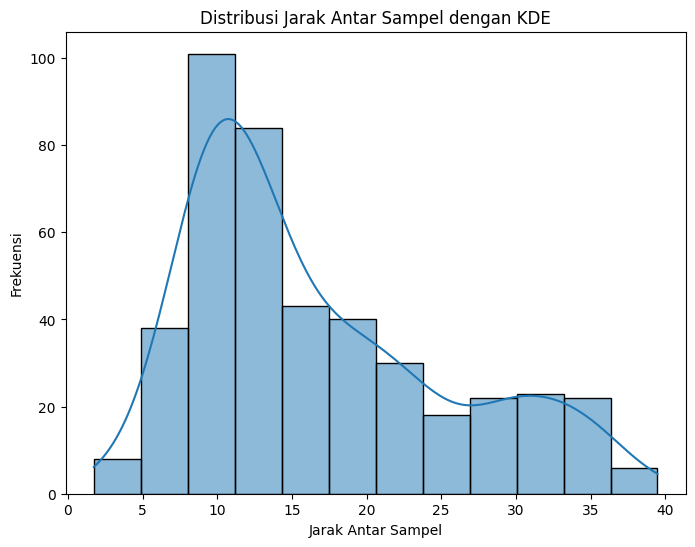

In [68]:
plt.figure(figsize=(8, 6))
sns.histplot(distances, kde=True)
plt.title('Distribusi Jarak Antar Sampel dengan KDE')
plt.xlabel('Jarak Antar Sampel')
plt.ylabel('Frekuensi')
plt.show()

In [52]:
sample_molecule_chembl_id = df_sample_molecule['molecule_chembl_id'].tolist()
print(sample_molecule_chembl_id)

['CHEMBL281947', 'CHEMBL31760', 'CHEMBL307643', 'CHEMBL73993', 'CHEMBL163420', 'CHEMBL300109', 'CHEMBL348913', 'CHEMBL223717', 'CHEMBL397728', 'CHEMBL465435', 'CHEMBL597606', 'CHEMBL589974', 'CHEMBL117', 'CHEMBL1097371', 'CHEMBL300814', 'CHEMBL1094154', 'CHEMBL1083353', 'CHEMBL1824769', 'CHEMBL1200374', 'CHEMBL2336860', 'CHEMBL2336856', 'CHEMBL2442759', 'CHEMBL3219070', 'CHEMBL934', 'CHEMBL3919759', 'CHEMBL4227385', 'CHEMBL5177928', 'CHEMBL137373', 'CHEMBL350072', 'CHEMBL348263']


In [53]:
sample_molecule_smiles = df_sample_molecule['canonical_smiles'].tolist()
print(sample_molecule_smiles)

['Nc1ccc(C23CC2C(=O)N(CC2CCCCC2)C3=O)cc1', 'C=C(c1ccc(C#N)cc1)n1ccnc1', 'CC12CCC3C(C[C@H](O)C4=CCCCC43C)C1CCC2=O', 'CC12CCC3C(C[C@@H](O)C4=CCCCC43C)C1CCC2=O', 'N#CCCCC1CCCc2cncn21', 'c1cnc2c(c1)C(Cn1ccnc1)CCC2', 'OCc1ccc(C2CCCc3cncn32)cc1', 'COc1ccc2c(c1)[C@H]1[C@@H](CC2)[C@@H]1c1ccncc1', 'O=C(c1ccccc1)c1cccc(Cn2ccnc2)c1', 'O=c1ccc2c(o1)CCCC2', 'N#Cc1ccc(Cn2cncn2)cc1-c1ccc(O)cc1', 'N#Cc1ccc(Cn2cncn2)cc1-c1cccc(Cl)c1', 'O=c1cc(-c2ccccc2)oc2cc(O)cc(O)c12', 'CC1=CC[C@@H]2[C@H]1[C@H]1OC(=O)[C@@H](C)[C@@H]1CC[C@]2(C)O', 'O=c1cc(-c2ccccc2)oc2cc(O)c(O)cc12', 'O=C1OC[C@H](Cc2ccccc2)[C@H]1Cc1cccc(O)c1', 'O=c1c2ccccc2sc2c(Cn3ccnc3)cccc12', 'N#Cc1ccc(Cn2ccnn2)cc1', 'C=C1C[C@@H]2[C@H](CC[C@]3(C)C(=O)CC[C@@H]23)[C@@]2(C)C=CC(=O)C=C12', 'c1ccc(-n2c(Cn3ccnc3)cc3ccccc32)cc1', 'Fc1ccc(-n2c(Cn3ccnc3)cc3ccccc32)cc1', 'Cc1cc(Cn2ccnc2)c2ccc3[nH]ccc3c2n1', 'O=c1c2ccccc2[nH]c2c(Cn3ccnc3)cccc12', 'CC(C)(C(=O)c1cccnc1)c1cccnc1', 'CCc1c(F)cncc1-c1nc2ccc(F)cn2c1C1CC1', 'Oc1ccccc1-c1csc(-c2ncccn2)n1', 'COc1ccc2cc

In [54]:
from rdkit import Chem
from rdkit.Chem import AllChem

for i in range(len(sample_molecule_smiles)):
    smiles = sample_molecule_smiles[i]
    chembl_id = sample_molecule_chembl_id[i]

    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            print(f"Gagal membuat molekul untuk SMILES {smiles}")
            continue

        mol = Chem.AddHs(mol)

        result = AllChem.EmbedMolecule(mol)
        if result == 0:
            AllChem.UFFOptimizeMolecule(mol)

            pdb_filename = f"{chembl_id}.pdb"
            Chem.MolToPDBFile(mol, pdb_filename)

            print(f"File PDB untuk ChemBL ID {chembl_id} telah disimpan sebagai {pdb_filename}.")
        else:
            print(f"Embedding gagal untuk SMILES {smiles}. Molekul {chembl_id} tidak diproses.")

    except Exception as e:
        print(f"Error saat memproses molekul {chembl_id}: {str(e)}")

File PDB untuk ChemBL ID CHEMBL281947 telah disimpan sebagai CHEMBL281947.pdb.
File PDB untuk ChemBL ID CHEMBL31760 telah disimpan sebagai CHEMBL31760.pdb.
File PDB untuk ChemBL ID CHEMBL307643 telah disimpan sebagai CHEMBL307643.pdb.
File PDB untuk ChemBL ID CHEMBL73993 telah disimpan sebagai CHEMBL73993.pdb.
File PDB untuk ChemBL ID CHEMBL163420 telah disimpan sebagai CHEMBL163420.pdb.
File PDB untuk ChemBL ID CHEMBL300109 telah disimpan sebagai CHEMBL300109.pdb.
File PDB untuk ChemBL ID CHEMBL348913 telah disimpan sebagai CHEMBL348913.pdb.
File PDB untuk ChemBL ID CHEMBL223717 telah disimpan sebagai CHEMBL223717.pdb.
File PDB untuk ChemBL ID CHEMBL397728 telah disimpan sebagai CHEMBL397728.pdb.
File PDB untuk ChemBL ID CHEMBL465435 telah disimpan sebagai CHEMBL465435.pdb.
File PDB untuk ChemBL ID CHEMBL597606 telah disimpan sebagai CHEMBL597606.pdb.
File PDB untuk ChemBL ID CHEMBL589974 telah disimpan sebagai CHEMBL589974.pdb.
File PDB untuk ChemBL ID CHEMBL117 telah disimpan sebaga

In [55]:
import py3Dmol
import os

for i in range(len(sample_molecule_chembl_id)):
    chembl_id = sample_molecule_chembl_id[i]

    pdb_filename = f'{chembl_id}.pdb'

    if not os.path.exists(pdb_filename):
        print(f'Skipping {chembl_id}: File not found.')
        continue

    try:
        with open(pdb_filename, 'r') as pdb_file:
            pdb_data = pdb_file.read()

        view = py3Dmol.view(width=800, height=400)
        view.addModel(pdb_data, "pdb")
        view.setStyle({'stick': {}})
        view.zoomTo()
        view.show()

        print(f'Berhasil menampilkan visualisasi untuk {chembl_id}')

    except Exception as e:
        print(f'Error saat memvisualisasikan {chembl_id}: {str(e)}')

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Berhasil menampilkan visualisasi untuk CHEMBL281947


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Berhasil menampilkan visualisasi untuk CHEMBL31760


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Berhasil menampilkan visualisasi untuk CHEMBL307643


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Berhasil menampilkan visualisasi untuk CHEMBL73993


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Berhasil menampilkan visualisasi untuk CHEMBL163420


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Berhasil menampilkan visualisasi untuk CHEMBL300109


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Berhasil menampilkan visualisasi untuk CHEMBL348913


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Berhasil menampilkan visualisasi untuk CHEMBL223717


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Berhasil menampilkan visualisasi untuk CHEMBL397728


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Berhasil menampilkan visualisasi untuk CHEMBL465435


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Berhasil menampilkan visualisasi untuk CHEMBL597606


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Berhasil menampilkan visualisasi untuk CHEMBL589974


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Berhasil menampilkan visualisasi untuk CHEMBL117


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Berhasil menampilkan visualisasi untuk CHEMBL1097371


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Berhasil menampilkan visualisasi untuk CHEMBL300814


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Berhasil menampilkan visualisasi untuk CHEMBL1094154


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Berhasil menampilkan visualisasi untuk CHEMBL1083353


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Berhasil menampilkan visualisasi untuk CHEMBL1824769


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Berhasil menampilkan visualisasi untuk CHEMBL1200374


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Berhasil menampilkan visualisasi untuk CHEMBL2336860


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Berhasil menampilkan visualisasi untuk CHEMBL2336856


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Berhasil menampilkan visualisasi untuk CHEMBL2442759


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Berhasil menampilkan visualisasi untuk CHEMBL3219070


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Berhasil menampilkan visualisasi untuk CHEMBL934


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Berhasil menampilkan visualisasi untuk CHEMBL3919759


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Berhasil menampilkan visualisasi untuk CHEMBL4227385


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Berhasil menampilkan visualisasi untuk CHEMBL5177928


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Berhasil menampilkan visualisasi untuk CHEMBL137373


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Berhasil menampilkan visualisasi untuk CHEMBL350072


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Berhasil menampilkan visualisasi untuk CHEMBL348263
